In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect = True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'],c['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
r_date = engine.execute('select max(date) from measurement')
for date in r_date:
    print(date[0])

2017-08-23


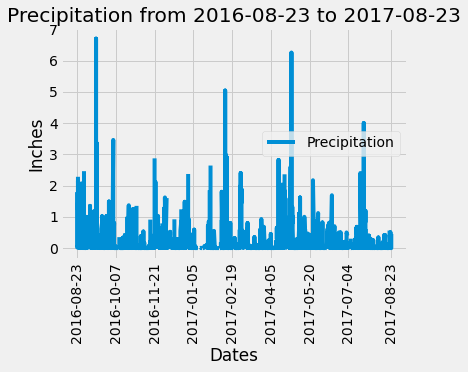

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
date1 = dt.datetime(2016,8,22)
past_12 = session.query(Measurement.prcp,Measurement.date).filter(Measurement.date > date1)
# Perform a query to retrieve the data and precipitation scores
prcp_dt_df = pd.DataFrame(past_12)
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
prcp_dt_df.index = prcp_dt_df['date']
prcp_dt_df = pd.DataFrame(prcp_dt_df['prcp']).sort_values(by = ['date'])
# Use Pandas Plotting with Matplotlib to plot the data
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.plot(prcp_dt_df.index,prcp_dt_df,label = 'Precipitation')
ax.set_xticks([0,45,90,135,180,225,270,315,365])
plt.xticks(rotation=90)
plt.title('Precipitation from 2016-08-23 to 2017-08-23')
plt.xlabel('Dates')
plt.ylabel('Inches')
plt.legend(loc="best")
plt.show()

In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_dt_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number stations in the dataset
station_count = engine.execute('select count(*) from station')
for s in station_count:
    print(f'There are {s[0]} stations')

There are 9 stations


In [54]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
station_act = engine.execute('select count(station),station from measurement group by station \
order by 1 desc')
for s in station_act:
    print(s[0],s[1])

2772 USC00519281
2724 USC00519397
2709 USC00513117
2669 USC00519523
2612 USC00516128
2202 USC00514830
1979 USC00511918
1372 USC00517948
511 USC00518838


In [113]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active = engine.execute('select min(tobs),max(tobs), avg(tobs)  from measurement where station = "USC00519281"')
m_temps = []
for m in most_active:
    print(f'Lowest Temp = {m[0]}, Highest Temp = {m[1]}, Average Temp = {m[2]} from the most active station USC00519281')
    m_temps.append(m)

Lowest Temp = 54.0, Highest Temp = 85.0, Average Temp = 71.66378066378067 from the most active station USC00519281


In [118]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_act_12 = session.query(Measurement)
for m in measurement:
    print()

TypeError: 'DeclarativeMeta' object is not iterable

# Close session

In [16]:
# Close Session
session.close()